In [1]:
import pandas as pd
import numpy as np

from google.colab import files

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [101]:
# 데이터 업로드
df = pd.read_csv('vgames2.csv')
df.head()
df_clean = df.copy()

In [102]:
# 데이터 정보와 크기 확인
print(df.shape)
df.info()

(16598, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [103]:
# 결측치와 필요없는 정보 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [104]:
df.duplicated().sum()

0

- 결측치를 확인해보면 'Year' column 에서 많이 빠져있다는 것을 알수있습니다. 이에 'Year' column의 결측치를 확인해보면

In [105]:
df[df['Year'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


- 이에 따라 결측치가 아닌 행들의 Year 분포를 확인하여 결측치 대체에 대한 고민을 해보았습니다.

In [106]:
df_notnull = df[df['Year'].notnull()]
df_notnull

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


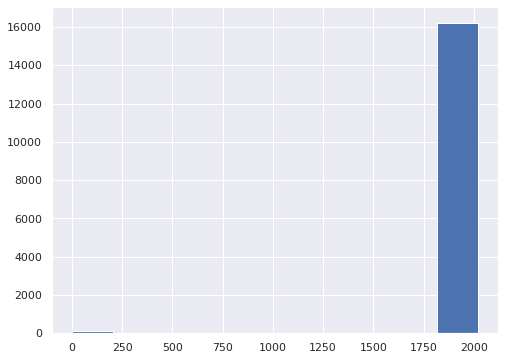

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist( df_notnull.Year , bins = 10)
plt.show()

- 여기서 게임을 팔았을리가 없는 년도의 데이터도 포함된 것을 확인(250년도이하) 해당행도 확인해 줍니다. 대략적으로 살펴봤을 때는 판매량이 낮은 게임 밖에 없어서, 인기있는 게임의 설계 방향과 큰 상관이 없을 것 같습니다.

In [108]:
df[(df['Year'] <= 250)]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...,...
15985,15986,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,16104,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,16150,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [109]:
df.Name.value_counts() # 게임의 종류가 많아 검색해서 일일이 결측치를 채우기에는 비효율적임

Need for Speed: Most Wanted            12
FIFA 14                                 9
Ratatouille                             9
Madden NFL 07                           9
LEGO Marvel Super Heroes                9
                                       ..
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64

- 판매량의 비중으로 결측치를 채워줄지 말지 여부를 결정 하도록 하겠습니다. 판매량의 데이터를 보면 숫자가아닌 K, M 을포함된 문자로 표현되어있습니다. 따라서 k->1000 M->1000000 로 바꿔줘야 할 것입니다. 또한 K가 있는 데이터 값은 정수, M이 있는 데이터 값은 소수인것으로 보아 문자가 없는 데이터도 기본단위는 M으로 추정됩니다.

In [110]:
df[df['NA_Sales'].str.contains('M')]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,459,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,578,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,626,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,673,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...,...
15986,15987,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16152,16153,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16169,16170,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16408,16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [111]:
import re

def convert_unit(sales): # 판매량의 단위를 통일해주는 함수
  unit = sales[-1:] # 값의 맨마지막 값을 저장
  sales = re.sub(r'[KM]', '',sales) # K,M 이 있으면 제거
  if unit == 'K':                     # sales의 마지막 값에 K가 있으면 천을 곱하고 이외의 경우에는 100000 을 곱해준다
    sales = float(sales) * 1000
    return sales

  else:
    sales = float(sales) * 100000
    return sales

In [112]:
# 해당 함수를 데이터 프레임에 적용
df_clean['NA_Sales'] = df_clean['NA_Sales'].apply(convert_unit)
df_clean['EU_Sales'] = df_clean['EU_Sales'].apply(convert_unit)
df_clean['JP_Sales'] = df_clean['JP_Sales'].apply(convert_unit)
df_clean['Other_Sales'] = df_clean['Other_Sales'].apply(convert_unit)

In [113]:
df_clean.sample(10) # 함수가 잘 처리 되었는지 확인

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14471,14472,Rock N' Roll Racing,SNES,1993.0,Racing,Interplay,0.0,0.0,1000.0,0.0
8621,8622,BMX XXX,XB,2002.0,Sports,Acclaim Entertainment,8000.0,2000.0,0.0,0.0
10575,10576,FIFA Soccer 07,GC,2006.0,Sports,Electronic Arts,14000.0,4000.0,0.0,0.0
6168,6169,Pia Carrot e Youkoso!! 2.5,DC,2008.0,Adventure,NEC Interchannel,0.0,0.0,4000.0,0.0
11514,11515,World Championship Poker 2: Featuring Howard L...,XB,2005.0,Misc,Crave Entertainment,7000.0,2000.0,0.0,0.0
9490,9491,Lode Runner 3-D,N64,1998.0,Action,Infogrames,8000.0,2000.0,0.0,0.0
12786,12787,Disney's Winnie the Pooh's Rumbly Tumbly Adven...,PS2,2005.0,Platform,Ubisoft,6000.0,5000.0,0.0,2000.0
9334,9335,WWE All Stars,Wii,2011.0,Fighting,THQ,11000.0,7000.0,0.0,2000.0
10649,10650,We Sing 80s,Wii,2012.0,Misc,Nordic Games,0.0,1000.0,0.0,0.0
4124,4125,WRC: FIA World Rally Championship,X360,NaN,Racing,Black Bean Games,0.0,10000.0,0.0,2000.0


In [114]:
df_clean[df_clean['Year'].isnull()] # 위에서 확인한바로 Year 결측치는 271이므로 Year컬럼의 결측치 확인

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,193000.0,34000.0,0.0,21000.0
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.0,0.0,2000.0,0.0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.0,6000.0,0.0,1000.0
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,3000.0,0.0,0.0,0.0
430,431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0.0,0.0,17000.0,3000.0
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,NaN,Racing,Unknown,1000.0,0.0,0.0,0.0
16275,16276,Space Invaders,2600,NaN,Shooter,Atari,236000.0,14000.0,0.0,3000.0
16278,16279,Madden NFL 11,Wii,NaN,Sports,Unknown,70000.0,0.0,0.0,50000.0
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,6000.0,0.0,0.0,0.0


In [115]:
 # 총 판매량이 얼마만큼을 차지 하는지 확인하기위해 계산해서 새로운 컬럼생성
df_clean['total sales'] = df_clean.iloc[:,5:].sum(axis='columns')
df_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4000.0,0.0,0.0,0.0,4000.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17000.0,0.0,0.0,1000.0,18000.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2000.0,0.0,2000.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4000.0,0.0,0.0,0.0,4000.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12000.0,9000.0,0.0,4000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,15000.0,4000.0,0.0,1000.0,20000.0
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,1000.0,0.0,0.0,0.0,1000.0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,44000.0,19000.0,3000.0,13000.0,79000.0
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,5000.0,5000.0,25000.0,3000.0,38000.0


In [116]:
# 총 판매량을 기준으로 상위 10위의 게임들을 추출
df_large10 = df_clean[['Name','total sales']].nlargest(10,'total sales',keep='first')

In [117]:
name = list(df_large10.Name) # 판매량 상위 10개 게임의 목록을 리스트로 저장
name

['Wii Sports',
 'Pokemon X/Pokemon Y',
 'The Legend of Zelda: Ocarina of Time',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Super Mario Bros. 3',
 'Pokemon Red/Pokemon Blue',
 'Final Fantasy IX',
 'Tetris']

In [118]:
for i in name: # 상위 10 개 게임중 Pokemon X/Pokemon Y 의 Genre 가 누락됨을 확인
  print(df_clean[df_clean['Name']== i])

      Unnamed: 0        Name Platform    Year   Genre Publisher   NA_Sales  \
2908        2909  Wii Sports      Wii  2006.0  Sports  Nintendo  4149000.0   

       EU_Sales  JP_Sales  Other_Sales  total sales  
2908  2902000.0  377000.0     846000.0    8274000.0  
      Unnamed: 0                 Name Platform    Year Genre Publisher  \
1971        1972  Pokemon X/Pokemon Y      3DS  2013.0   NaN  Nintendo   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  total sales  
1971  5170000.0  405000.0  434000.0      79000.0    6088000.0  
      Unnamed: 0                                  Name Platform    Year  \
1964        1965  The Legend of Zelda: Ocarina of Time      N64  1998.0   
3148        3149  The Legend of Zelda: Ocarina of Time      3DS  2011.0   

       Genre Publisher   NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1964  Action  Nintendo  4100000.0  189000.0  145000.0      16000.0   
3148  Action  Nintendo   203000.0  127000.0   62000.0      30000.0   

      total sales  
1

In [119]:
df_clean.Name.duplicated().sum()

5105

In [120]:
df_clean['total sales'].mean()

57221.41221833956

{'boxes': [<matplotlib.lines.Line2D at 0x7f9650288610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f96501b1f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f965014fb90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f965014f290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9650288410>,
  <matplotlib.lines.Line2D at 0x7f965091c610>]}

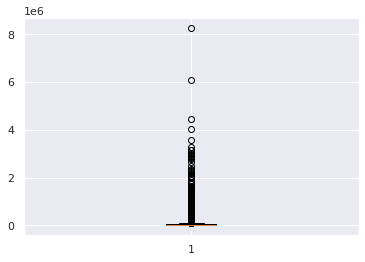

In [121]:
plt.boxplot(df_clean['total sales']) # 데이터의 비중이 골고루 분포 되어있음

In [122]:
df_clean[df_clean['Name']== 'Pokemon X/Pokemon Y']

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
1971,1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000.0,405000.0,434000.0,79000.0,6088000.0


In [123]:
# 해당 결측치의 올바른 장르를 기입해줌
df_clean.loc[df_clean['Name']== 'Pokemon X/Pokemon Y', 'Genre'] =  'Role-Playing' 

In [124]:
df_clean[df_clean['Name']== 'Pokemon X/Pokemon Y']

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
1971,1972,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5170000.0,405000.0,434000.0,79000.0,6088000.0


In [125]:
df_clean.drop(['Unnamed: 0','total sales'], axis='columns', inplace=True)

- 여러 방법을 시도해 보았으나 게임 이름은 같아도 플랫폼에 따라 출시년도가 다른경우도 있고 년도가 잘못 기입된 행도 백개나 존재 하였습니다. 데이터의 오류를 모두 수정하기에는 오랜시간이 걸릴뿐더러 총 판매량 상위 10위권의 게임에는 포켓몬을 제외하고 결측치가 없음을 확인 하였으므로, 데이터를 최대한 보존하기 위해서 'Year', 'Genre'에 포함된 결측치는 제거해주고, 'Publisher'의 결측치는 'Unknown'으로 대체 해주도록 하겠습니다.

In [126]:
df_clean.Publisher.fillna('Unknown', inplace=True)

In [127]:
df_clean = df_clean.dropna()

In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16278 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16278 non-null  object 
 1   Platform     16278 non-null  object 
 2   Year         16278 non-null  float64
 3   Genre        16278 non-null  object 
 4   Publisher    16278 non-null  object 
 5   NA_Sales     16278 non-null  float64
 6   EU_Sales     16278 non-null  float64
 7   JP_Sales     16278 non-null  float64
 8   Other_Sales  16278 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [129]:
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

- 다음은 이상치 입니다. 아까 발견했던 'Year' 컬럼의 이상치들을 제거해줍니다.

In [130]:
df_clean['Year'] = df_clean['Year'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
df_clean = df_clean.drop(df_clean[df_clean['Year'] <= 250].index)

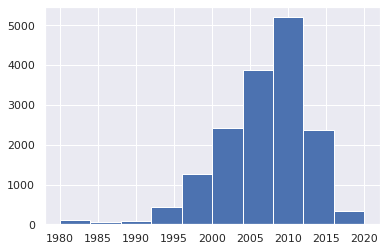

In [132]:
plt.hist(df_clean['Year'], bins= 10) # 이상치들이 제거됨
plt.show()

In [133]:
df_clean # EDA가 완료됌

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000.0,0.0,0.0,1000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000.0,9000.0,0.0,4000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15000.0,4000.0,0.0,1000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44000.0,19000.0,3000.0,13000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5000.0,5000.0,25000.0,3000.0


- 세부적인 게임의 설계의 이전에, 어떤 장르의 게임을 만들 것인지가 핵심 주제가 되겠습니다. 그렇다면 지역별, 연별로 게이머들이 선호하는 장르가 있는지 살펴보겠습니다.

# ▶ 가설 1 : 지역별로 선호하는 게임 장르가 있는가?

- *지역별* 선호하는 게임 장르를 살펴보겠습니다.

In [35]:
import seaborn as sns
df_genre = df_clean.groupby('Genre').sum()
df_genre

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6481546,91926000.0,55050000.0,16627000.0,19183000.0
Adventure,2542300,10389000.0,6463000.0,5235000.0,1736000.0
Fighting,1661830,22740000.0,11223000.0,8801000.0,3736000.0
Misc,3402276,43369000.0,22899000.0,10578000.0,7381000.0
Platform,1735332,47225000.0,21103000.0,13111000.0,5421000.0
Puzzle,1120906,12154000.0,5085000.0,5619000.0,1239000.0
Racing,2425871,40298000.0,23988000.0,5776000.0,7929000.0
Role-Playing,2928284,36967000.0,18064000.0,37506000.0,6207000.0
Shooter,2543486,59474000.0,33732000.0,3770000.0,10388000.0


In [36]:
df_genre = df_genre.reset_index()

In [37]:
df_genre.drop('Year',axis='columns',inplace=True)

Text(0.5, 1.0, 'Others Sales')

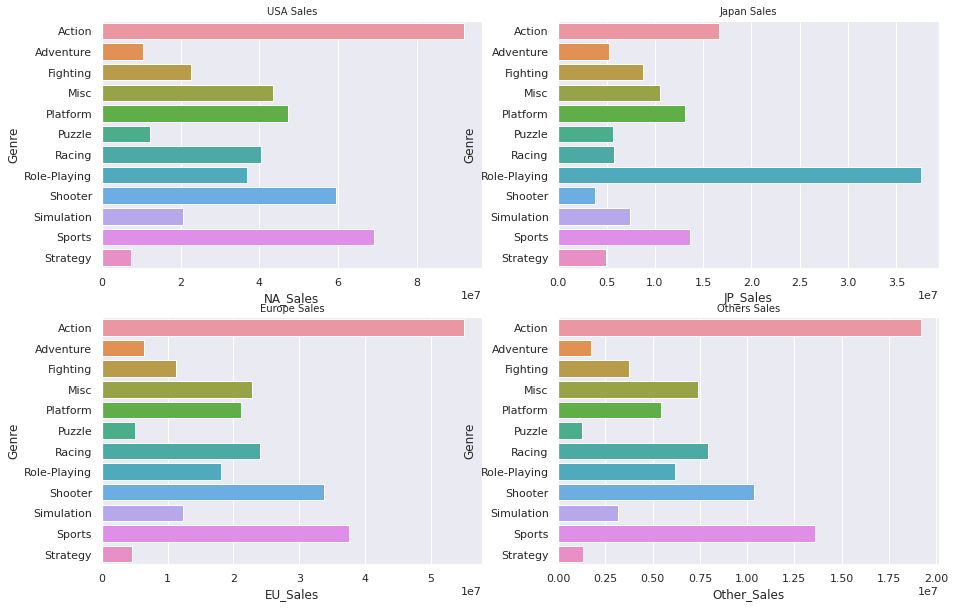

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot( data=df_genre, x='NA_Sales', y='Genre', orient = 'h')
plt.title ( 'USA Sales', fontsize = 10)
plt.subplot(222)
sns.barplot( data=df_genre, x='JP_Sales', y='Genre', orient = 'h')
plt.title ( 'Japan Sales', fontsize = 10)
plt.subplot(223)
sns.barplot( data=df_genre, x='EU_Sales', y='Genre', orient = 'h')
plt.title ( 'Europe Sales', fontsize = 10)
plt.subplot(224)
sns.barplot( data=df_genre, x='Other_Sales', y='Genre', orient = 'h')
plt.title ( 'Others Sales', fontsize = 10)
plt.show()

- Graph를 그려보니 대부분의 국가에서 Action 장르를 선호 하나, 일본에서는 role-play 장르를 선호합니다. 하지만 Action이 전 세계에서 강세를 보이고 있습니다.

# ▶ 가설 2 : 연도별 게임 장르 트렌드가 있는가?<br>
- 다음은 연도별 게임트렌드를 살펴보겠습니다.

In [39]:
df_year = df_clean.groupby(['Genre','Year']).sum() # 장르와 년도 기준 그룹화

In [40]:
df_year = df_year.sort_values('Year') # 연도기준 오름차순 정렬
df_year = df_year.reset_index() # 인덱스 해제

In [41]:
df_year

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1980,32000.0,2000.0,0.0,0.0
1,Fighting,1980,72000.0,4000.0,0.0,1000.0
2,Shooter,1980,656000.0,43000.0,0.0,8000.0
3,Misc,1980,253000.0,15000.0,0.0,2000.0
4,Sports,1981,74000.0,4000.0,0.0,0.0
...,...,...,...,...,...,...
383,Fighting,2016,160000.0,115000.0,64000.0,46000.0
384,Strategy,2016,11000.0,32000.0,5000.0,4000.0
385,Action,2017,0.0,0.0,1000.0,0.0
386,Role-Playing,2017,0.0,0.0,4000.0,0.0


In [42]:
def total_sales(df):
  df['sum'] = df.iloc[:,2:6].sum(axis='columns') # 연간 총 판매량을 계산
  df = df.drop(df.iloc[:,2:6].columns, axis='columns')
  return df

In [43]:
df_year = total_sales(df_year)
df_year

,Genre,Year,sum
0,Action,1980,34000.0
1,Fighting,1980,77000.0
2,Shooter,1980,707000.0
3,Misc,1980,270000.0
4,Sports,1981,78000.0
...,...,...,...
383,Fighting,2016,385000.0
384,Strategy,2016,52000.0
385,Action,2017,1000.0
386,Role-Playing,2017,4000.0


In [44]:
df_year = df_year.pivot(index='Year', columns='Genre', values = 'sum').fillna(0)
df_year

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,34000.0,0.0,77000.0,270000.0,0.0,0.0,0.0,0.0,707000.0,0.0,0.0,0.0
1981,1578000.0,0.0,0.0,0.0,692000.0,225000.0,48000.0,0.0,1002000.0,44000.0,78000.0,0.0
1982,650000.0,0.0,0.0,87000.0,503000.0,1004000.0,157000.0,0.0,381000.0,0.0,106000.0,0.0
1983,286000.0,40000.0,0.0,214000.0,693000.0,78000.0,0.0,0.0,49000.0,0.0,320000.0,0.0
1984,185000.0,0.0,0.0,145000.0,69000.0,314000.0,595000.0,0.0,3110000.0,0.0,617000.0,0.0
1985,352000.0,0.0,105000.0,0.0,4317000.0,321000.0,0.0,0.0,100000.0,4000.0,196000.0,0.0
1986,1374000.0,0.0,0.0,0.0,834000.0,0.0,196000.0,252000.0,389000.0,0.0,558000.0,0.0
1987,111000.0,438000.0,542000.0,0.0,174000.0,0.0,0.0,465000.0,69000.0,0.0,371000.0,0.0
1988,174000.0,0.0,0.0,0.0,2944000.0,558000.0,214000.0,588000.0,51000.0,3000.0,360000.0,0.0


In [45]:
# 연도별 판매량의 비중을 구하기 위한 함수
def get_ratio(df):
  df_sum = df.sum(axis=1)
  df_ratio = df.div(df_sum, axis=0)
  return df_ratio

In [46]:
df_year_ratio = get_ratio(df_year)
df_year_ratio

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.031250,0.000000,0.070772,0.248162,0.000000,0.000000,0.000000,0.000000,0.649816,0.000000,0.000000,0.000000
1981,0.430325,0.000000,0.000000,0.000000,0.188710,0.061358,0.013090,0.000000,0.273248,0.011999,0.021271,0.000000
1982,0.225069,0.000000,0.000000,0.030125,0.174169,0.347645,0.054363,0.000000,0.131925,0.000000,0.036704,0.000000
1983,0.170238,0.023810,0.000000,0.127381,0.412500,0.046429,0.000000,0.000000,0.029167,0.000000,0.190476,0.000000
1984,0.036743,0.000000,0.000000,0.028798,0.013704,0.062363,0.118173,0.000000,0.617676,0.000000,0.122542,0.000000
1985,0.065246,0.000000,0.019462,0.000000,0.800185,0.059500,0.000000,0.000000,0.018536,0.000741,0.036330,0.000000
1986,0.381349,0.000000,0.000000,0.000000,0.231474,0.000000,0.054399,0.069942,0.107966,0.000000,0.154871,0.000000
1987,0.051152,0.201843,0.249770,0.000000,0.080184,0.000000,0.000000,0.214286,0.031797,0.000000,0.170968,0.000000
1988,0.035568,0.000000,0.000000,0.000000,0.601799,0.114064,0.043745,0.120196,0.010425,0.000613,0.073590,0.000000


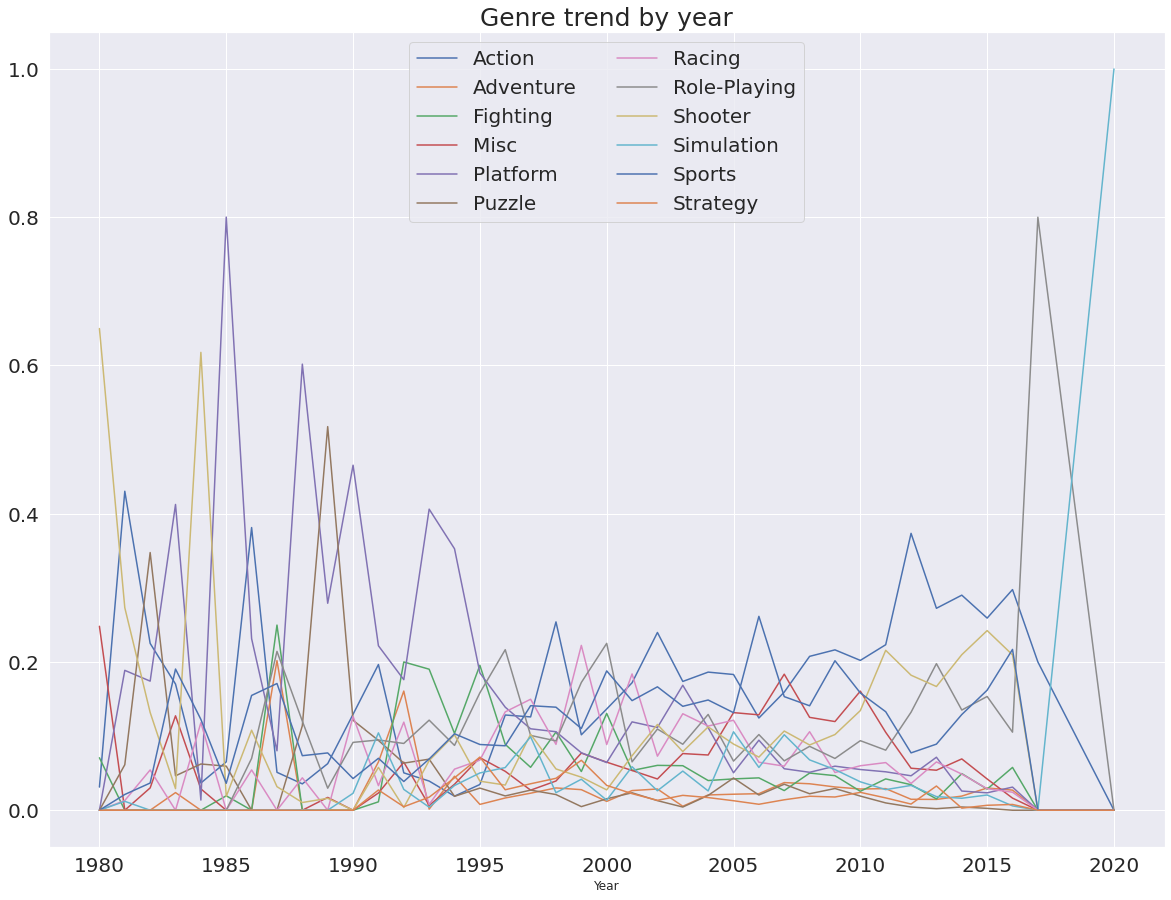

In [47]:
df_year_ratio.plot(kind='line',figsize=(20,15),fontsize = 20)
plt.legend(fontsize = 20,ncol= 2 )
plt.title('Genre trend by year', fontsize = 25)
plt.show()

- 위 그래프 게임장르의 트렌드 그래프입니다. 너무 복잡하여 세부적인 판매량의 비교가 어렵습니다. 따라서 5년단위로 묶어서 판매량을 다시 계산해주어 그래프를 간소화합니다.

In [48]:
df_year.reset_index(inplace=True)

In [49]:
def div_5years(df):
  bins = list(range(1980,2021,5)) # 5년단위로 분리
  bins_label = [str(x)+"~"+str(x+4) for x in bins] # 라벨링 작업
  df['year'] = pd.cut(df['Year'], bins, right=False, labels = bins_label[:-1]) # Year 컬럼기준 구간 나누기
  df = df.groupby('year').sum() # 새로운 라벨 기준으로 구간합을 구하고 정렬
  df.drop(['Year'],axis='columns',inplace=True) # 기존 Year 컬럼 삭제
  return df

In [50]:
df_year = div_5years(df_year)
df_year

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year,,,,,,,,,,,,
1980~1984,2733000.0,40000.0,77000.0,716000.0,1957000.0,1621000.0,800000.0,0.0,5249000.0,44000.0,1121000.0,0.0
1985~1989,2476000.0,438000.0,647000.0,128000.0,10335000.0,4708000.0,410000.0,1525000.0,728000.0,7000.0,2057000.0,0.0
1990~1994,2035000.0,1829000.0,3282000.0,890000.0,9146000.0,1877000.0,2132000.0,2736000.0,1365000.0,977000.0,1906000.0,568000.0
1995~1999,16064000.0,2569000.0,9417000.0,5588000.0,12173000.0,2017000.0,15305000.0,15541000.0,6155000.0,5622000.0,12810000.0,5120000.0
2000~2004,33734000.0,3446000.0,11598000.0,11298000.0,21549000.0,2717000.0,21310000.0,21225000.0,15760000.0,6580000.0,28277000.0,3646000.0
2005~2009,55092000.0,9321000.0,12745000.0,42108000.0,18725000.0,9016000.0,23911000.0,23721000.0,28228000.0,23262000.0,53840000.0,4507000.0
2010~2014,61595000.0,5180000.0,7571000.0,22239000.0,12126000.0,2072000.0,13169000.0,29103000.0,41870000.0,6500000.0,28144000.0,4278000.0
2015~2019,9057000.0,1000000.0,1163000.0,1260000.0,849000.0,69000.0,954000.0,4893000.0,8009000.0,600000.0,5865000.0,234000.0


In [51]:
df_year_ratio = get_ratio(df_year)
df_year_ratio

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year,,,,,,,,,,,,
1980~1984,0.190347,0.002786,0.005363,0.049868,0.136300,0.112899,0.055718,0.000000,0.365580,0.003064,0.078075,0.000000
1985~1989,0.105546,0.018671,0.027580,0.005456,0.440556,0.200691,0.017477,0.065007,0.031033,0.000298,0.087685,0.000000
1990~1994,0.070800,0.063633,0.114184,0.030964,0.318199,0.065303,0.074175,0.095188,0.047490,0.033991,0.066312,0.019761
1995~1999,0.148218,0.023703,0.086888,0.051559,0.112317,0.018610,0.141215,0.143392,0.056790,0.051873,0.118194,0.047241
2000~2004,0.186232,0.019024,0.064028,0.062372,0.118963,0.014999,0.117644,0.117175,0.087005,0.036325,0.156106,0.020128
2005~2009,0.180940,0.030613,0.041859,0.138297,0.061499,0.029612,0.078532,0.077908,0.092710,0.076400,0.176828,0.014802
2010~2014,0.263399,0.022151,0.032376,0.095101,0.051854,0.008860,0.056315,0.124453,0.179049,0.027796,0.120352,0.018294
2015~2019,0.266751,0.029452,0.034253,0.037110,0.025005,0.002032,0.028098,0.144111,0.235885,0.017671,0.172739,0.006892


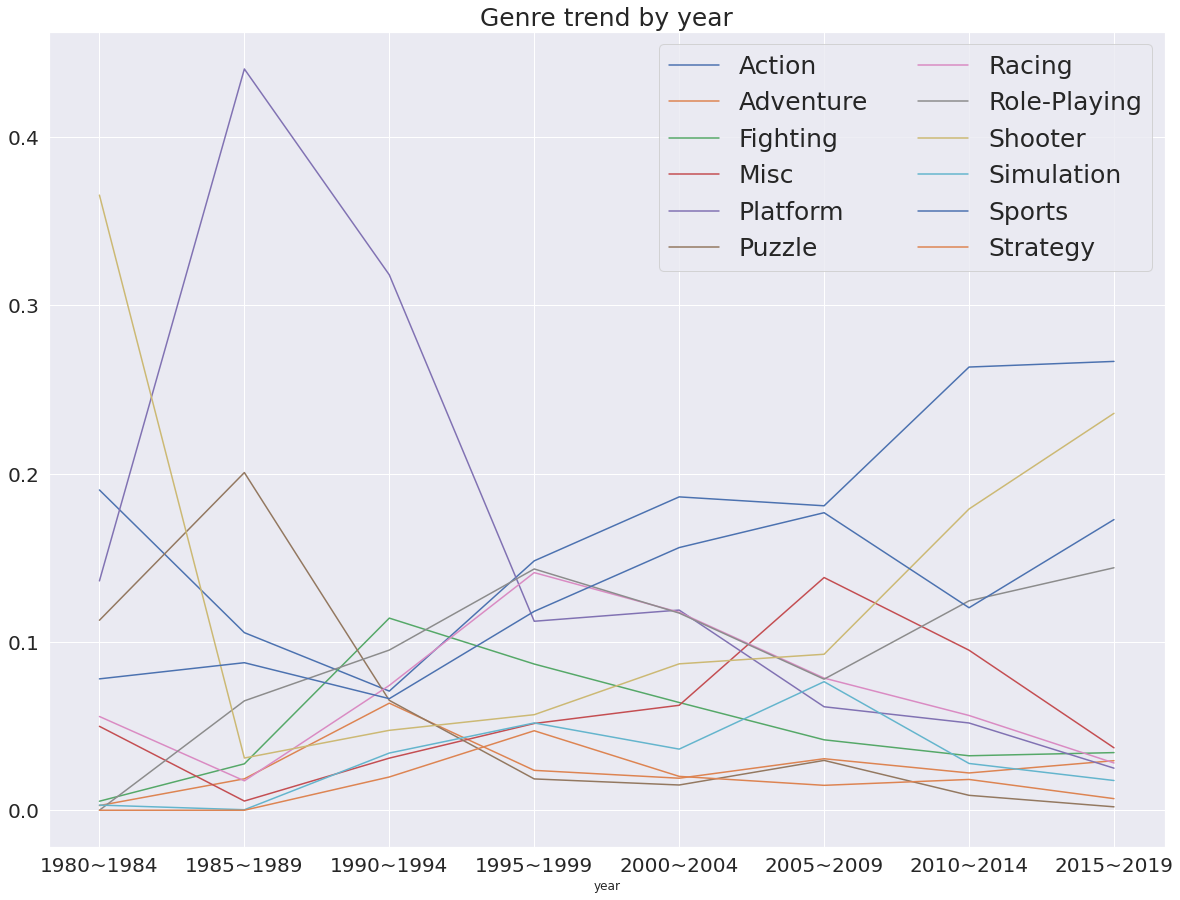

In [52]:
df_year_ratio.plot(kind='line',figsize=(20,15),fontsize = 20)
plt.legend(fontsize = 25,ncol= 2 )
plt.title('Genre trend by year', fontsize = 25)
plt.show()

- 1980 ~ 1984 : 슈팅게임 <br>
- 1985 ~ 1999 : 비디오게임 <br>
- 2000 ~ 2009 : 액션게임, 스포츠게임 <br>
- 2010 ~ 2019 : 액션게임, 슈팅게임 <br>

> 위의 결과로 보아 게임에 트렌드가 있음을 알 수 있습니다. <br>
> 게임의 트렌드에 작용할 수 있는 요인에는 제가 추측 했을때 가장 큰 요소는 '접근성'에 있다고 생각했습니다. <br><br>
왜냐하면 과거에 출시 했던 게임들은 기술의 한계로 게임의 장르가 한정적이기 때문에 기반이 갖춰줘야하므로 비용도 상당하고 원하는게임 보다는 제공되어 있는 게임을 플레이 해야했습니다.<br>
본업을 마치고 여가시간이나 쉬는시간에 게임을 하기 마련인데, 단지 게임을 하기 위해 자원과 시간을 소모하기에는 아깝기 때문입니다.(Ex. 오락실, 가정용 게임기)<br><br>
>그런 이유로, 사람들은 쉽게 접근이 가능한 플랫폼에서 게임을 했을 것이므로 어떤 플랫폼을 주로 이용했는지 확인해 봐야 할 것입니다.

# ▶ 가설 3 : 플랫폼(접근성)이 게임의 인기에 영향을 미치는가?<br>

In [53]:
df_clean.Platform.value_counts()

DS      2113
PS2     2109
PS3     1291
Wii     1279
X360    1227
PSP     1186
PS      1178
PC       934
GBA      805
XB       794
GC       538
3DS      496
PSV      406
PS4      332
N64      311
SNES     236
XOne     212
SAT      170
WiiU     143
2600     115
NES       97
GB        96
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [54]:
df_platform = df_clean.groupby(['Year','Platform']).sum()
df_platform

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year Platform                                            
1980 2600      1013000.0   64000.0       0.0      11000.0
1981 2600      3340000.0  295000.0       0.0      32000.0
1982 2600      2692000.0  165000.0       0.0      31000.0
1983 2600       544000.0   34000.0       0.0       6000.0
     NES        232000.0   46000.0  810000.0       8000.0
...                  ...       ...       ...          ...
2016 X360        36000.0   40000.0       0.0       7000.0
     XOne       669000.0  463000.0    1000.0     105000.0
2017 PS4             0.0       0.0    3000.0          0.0
     PSV             0.0       0.0    2000.0          0.0
2020 DS          27000.0       0.0       0.0       2000.0

[241 rows x 4 columns]

In [55]:
df_platform.reset_index(inplace=True)

In [56]:
df_platform = total_sales(df_platform)
df_platform

,Year,Platform,sum
0,1980,2600,1088000.0
1,1981,2600,3667000.0
2,1982,2600,2888000.0
3,1983,2600,584000.0
4,1983,NES,1096000.0
...,...,...,...
236,2016,X360,83000.0
237,2016,XOne,1238000.0
238,2017,PS4,3000.0
239,2017,PSV,2000.0


In [57]:
df_platform = df_platform.pivot(index='Year', columns='Platform', values = 'sum').fillna(0)
df_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,1088000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,3667000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,2888000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,584000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,27000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,45000.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,67000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,194000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,74000.0,0.0,0.0,0.0,0.0,143000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_platform.reset_index(inplace= True)

In [59]:
df_platform = div_5years(df_platform)
df_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year,,,,,,,,,,,,,,,,,,,,,
1980~1984,8254000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985~1989,443000.0,0.0,0.0,0.0,2000.0,6640000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990~1994,0.0,2000.0,0.0,0.0,0.0,4813000.0,0.0,0.0,3069000.0,4000.0,...,365000.0,186000.0,15259000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995~1999,0.0,8000.0,0.0,854000.0,0.0,11090000.0,0.0,0.0,0.0,0.0,...,3175000.0,0.0,4841000.0,16000.0,46000.0,0.0,0.0,0.0,0.0,0.0
2000~2004,0.0,0.0,0.0,735000.0,1741000.0,2880000.0,31071000.0,15823000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,96000.0,0.0,0.0,0.0,19057000.0,0.0
2005~2009,0.0,0.0,0.0,6000.0,69924000.0,0.0,4537000.0,4032000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,69098000.0,0.0,44872000.0,5980000.0,0.0
2010~2014,0.0,0.0,26307000.0,0.0,11641000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22944000.0,6817000.0,55815000.0,0.0,8599000.0
2015~2019,0.0,0.0,3417000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,156000.0,1965000.0,1385000.0,0.0,7003000.0


In [60]:
df_platform_ratio = get_ratio(df_platform)
df_platform_ratio

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year,,,,,,,,,,,,,,,,,,,,,
1980~1984,0.574871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985~1989,0.018884,0.000000,0.000000,0.000000,0.000085,0.283047,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990~1994,0.000000,0.000070,0.000000,0.000000,0.000000,0.167449,0.000000,0.000000,0.106774,0.000139,...,0.012699,0.006471,0.530877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995~1999,0.000000,0.000074,0.000000,0.007880,0.000000,0.102324,0.000000,0.000000,0.000000,0.000000,...,0.029295,0.000000,0.044667,0.000148,0.000424,0.000000,0.000000,0.000000,0.000000,0.000000
2000~2004,0.000000,0.000000,0.000000,0.004058,0.009611,0.015899,0.171530,0.087352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000530,0.000000,0.000000,0.000000,0.105206,0.000000
2005~2009,0.000000,0.000000,0.000000,0.000020,0.229654,0.000000,0.014901,0.013242,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.226941,0.000000,0.147375,0.019640,0.000000
2010~2014,0.000000,0.000000,0.112497,0.000000,0.049780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.098115,0.029152,0.238682,0.000000,0.036772
2015~2019,0.000000,0.000000,0.100639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004595,0.057874,0.040792,0.000000,0.206256


In [61]:
df_top = df_platform_ratio[df_platform_ratio >= 0.2].dropna(how='all', axis=1) # 비중이 0.2 이상이 되는 플랫폼 추출

In [62]:
df_top.columns 

Index(['2600', 'DS', 'GB', 'NES', 'PS', 'PS2', 'PS3', 'PS4', 'SNES', 'Wii',
       'X360', 'XOne'],
      dtype='object', name='Platform')

In [63]:
top_columns = np.array(df_top.columns) # 비중 0.2이상이 되는 플랫폼의 Name을 저장

In [64]:
df_platform_ratio = df_platform_ratio[top_columns]
df_platform_ratio

Platform,2600,DS,GB,NES,PS,PS2,PS3,PS4,SNES,Wii,X360,XOne
year,,,,,,,,,,,,
1980~1984,0.574871,0.000000,0.000000,0.425129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985~1989,0.018884,0.000085,0.283047,0.697685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990~1994,0.000000,0.000000,0.167449,0.095815,0.020979,0.000000,0.000000,0.000000,0.530877,0.000000,0.000000,0.000000
1995~1999,0.000000,0.000000,0.102324,0.000000,0.583774,0.000000,0.000000,0.000000,0.044667,0.000000,0.000000,0.000000
2000~2004,0.000000,0.009611,0.015899,0.000000,0.103528,0.454025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005~2009,0.000000,0.229654,0.000000,0.000000,0.000000,0.139174,0.119862,0.000000,0.000000,0.226941,0.147375,0.000000
2010~2014,0.000000,0.049780,0.000000,0.000000,0.000000,0.002382,0.270959,0.058876,0.000000,0.098115,0.238682,0.036772
2015~2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062410,0.465143,0.000000,0.004595,0.040792,0.206256


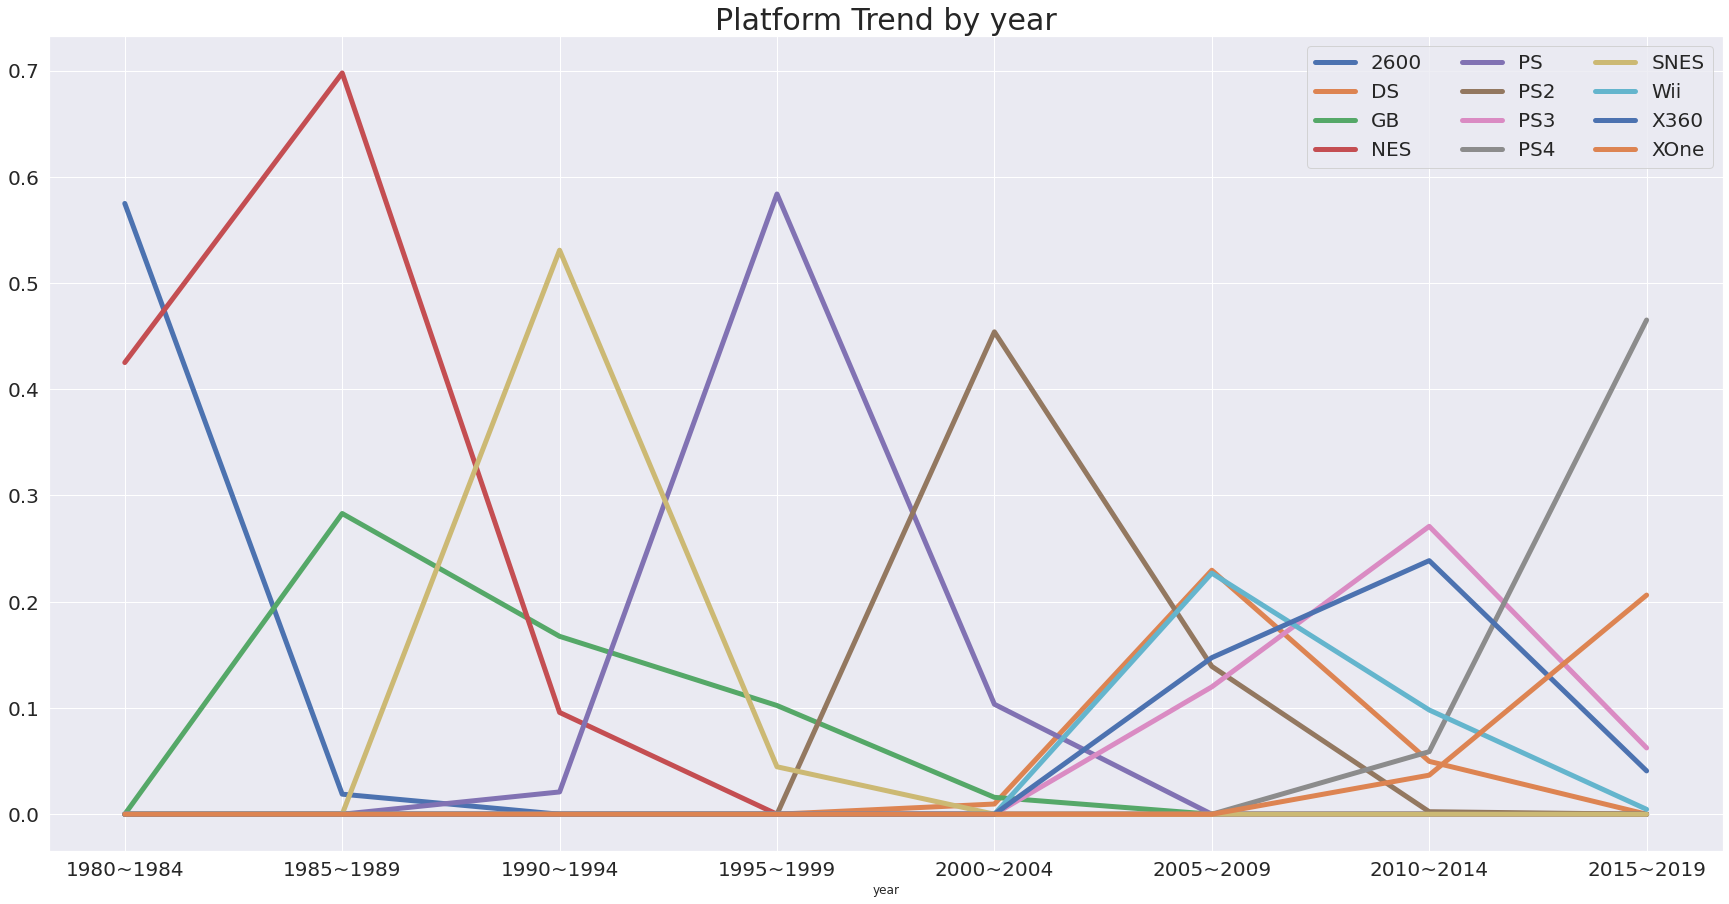

In [168]:
df_platform_ratio.plot(kind='line',figsize=(30,15),fontsize = 20, linewidth=5.0)
plt.legend(fontsize = 20,ncol= 3 )
plt.title('Platform Trend by year', fontsize = 30)
plt.show()

- 게임 장르의 트렌드는 '접근성'에 따라 변화 했다고 생각했으나, 게임 플랫폼의 변천사를 보면 atari 2600 -> nes -> snes - > ps -> ps2 -> ps3 -> ps4 순으로 같은 가정용 게임기 종류로 '접근성' 보다는 게임기의 기술의 발달에 따라 세대교체가 이뤄졌습니다.

- 또한 개인용컴퓨터(PC)과 인터넷의 상용화로 최근 출시작들은 가정용 게임기 플랫폼(PS, Xbox)와 PC버전을 동시에 출시하는 경향을 보이고 있지만 데이터에 반영 되지는 않은 것을 보니, 최근 몇 년간의 데이터는 부정확하다고 추측 할 수 있습니다.<br>
 따라서 플랫폼 즉 '접근성'과 게임 장르의 트렌드는 서로 큰 연관이 없다고 결론지을 수 있습니다.

- __그렇다면, 인기를 끌었던 게임의 특징을 살펴봐야할 것 같습니다.__

In [66]:
df_game = df_clean.groupby(['Name','Year']).sum()
df_game

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,Year,,,,
'98 Koshien,1998,15000.0,10000.0,12000.0,3000.0
.hack//G.U. Vol.1//Rebirth,2006,0.0,0.0,17000.0,0.0
.hack//G.U. Vol.2//Reminisce,2006,11000.0,9000.0,0.0,3000.0
.hack//G.U. Vol.2//Reminisce (jp sales),2006,0.0,0.0,16000.0,0.0
.hack//G.U. Vol.3//Redemption,2007,0.0,0.0,17000.0,0.0
...,...,...,...,...,...
thinkSMART FAMILY!,2010,3000.0,0.0,0.0,0.0
thinkSMART: Chess for Kids,2011,1000.0,0.0,0.0,0.0
uDraw Studio,2010,167000.0,58000.0,0.0,20000.0


In [67]:
df_game.reset_index(inplace=True)

In [68]:
df_game = total_sales(df_game)
df_game

,Name,Year,sum
0,'98 Koshien,1998,40000.0
1,.hack//G.U. Vol.1//Rebirth,2006,17000.0
2,.hack//G.U. Vol.2//Reminisce,2006,23000.0
3,.hack//G.U. Vol.2//Reminisce (jp sales),2006,16000.0
4,.hack//G.U. Vol.3//Redemption,2007,17000.0
...,...,...,...
12031,thinkSMART FAMILY!,2010,3000.0
12032,thinkSMART: Chess for Kids,2011,1000.0
12033,uDraw Studio,2010,245000.0
12034,uDraw Studio: Instant Artist,2011,21000.0


In [80]:
df_topten = df_game.nlargest(10,'sum',keep='first')

In [139]:
df_topten

,Name,Year,sum
11542,Wii Sports,2006,8274000.0
7685,Pokemon X/Pokemon Y,2013,6088000.0
10460,The Legend of Zelda: Ocarina of Time,1998,4450000.0
1293,Call of Duty: Ghosts,2013,4339000.0
9776,Super Mario Bros.,1985,4024000.0
3904,Grand Theft Auto V,2013,3777000.0
757,Battlefield 3,2011,3654000.0
512,Assassin's Creed III,2012,3614000.0
5816,Mario Kart Wii,2008,3583000.0
11544,Wii Sports Resort,2009,3300000.0


In [86]:
df_topten['sum']

11542    8274000.0
7685     6088000.0
10460    4450000.0
1293     4339000.0
9776     4024000.0
3904     3777000.0
757      3654000.0
512      3614000.0
5816     3583000.0
11544    3300000.0
Name: sum, dtype: float64

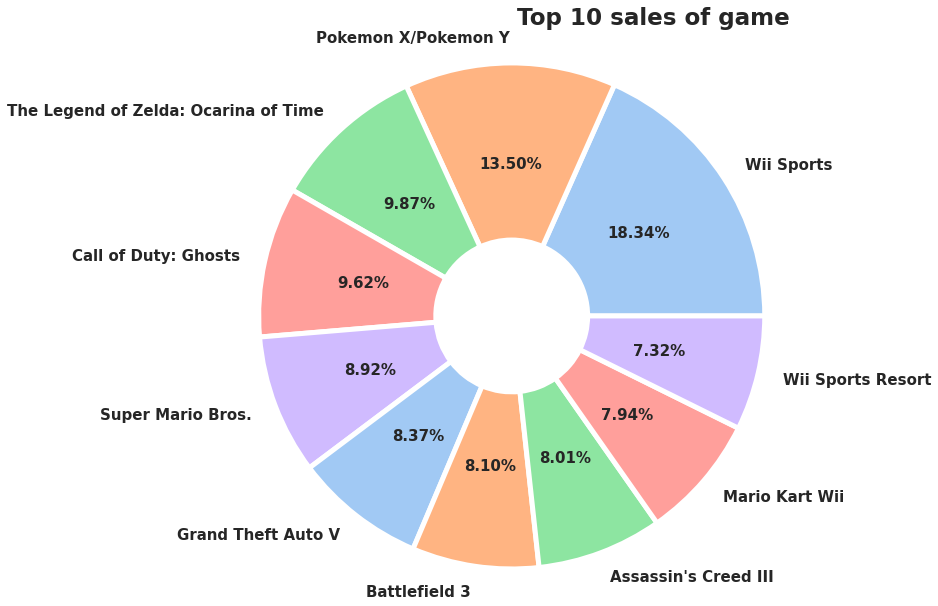

In [97]:
title_font ={
    'fontsize' : 23,
    'fontweight' : 'bold'
}
label_font ={
    'fontsize' : 15,
    'fontweight': 'bold'
}
wedgeprops={'width' : 0.7, 'edgecolor' : 'w', 'linewidth' : 5}
plt.figure(figsize= (10,10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(
    df_topten['sum'],
    labels = df_topten['Name'],
    colors = colors,
    autopct='%.2f%%',
    wedgeprops = wedgeprops,
    textprops= label_font)
plt.title('Top 10 sales of game', fontdict = title_font,loc = 'right', pad = 20)
plt.axis('equal')
plt.show()

- 높은 판매량을 보여준 게임들은 'Will Sports', 'Pokemon','The Legend of Zelda : Ocarina of Time'입니다. 설계할 게임의 장르를 선정하기 앞서서, 역대 인기있었던 게임의 장르를 살펴봐야 할 것 같습니다.

In [135]:
df_clean['total sales'] = df_clean.iloc[:,5:].sum(axis='columns')
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000.0,0.0,0.0,0.0,4000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000.0,0.0,0.0,1000.0,18000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2000.0,0.0,2000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000.0,0.0,0.0,0.0,4000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000.0,9000.0,0.0,4000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15000.0,4000.0,0.0,1000.0,20000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1000.0,0.0,0.0,0.0,1000.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44000.0,19000.0,3000.0,13000.0,79000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5000.0,5000.0,25000.0,3000.0,38000.0


In [143]:
df_new = df_clean.groupby(['Name','Year','Genre']).sum()
df_new

,,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
Name,Year,Genre,,,,,
'98 Koshien,1998,Sports,15000.0,10000.0,12000.0,3000.0,40000.0
.hack//G.U. Vol.1//Rebirth,2006,Role-Playing,0.0,0.0,17000.0,0.0,17000.0
.hack//G.U. Vol.2//Reminisce,2006,Role-Playing,11000.0,9000.0,0.0,3000.0,23000.0
.hack//G.U. Vol.2//Reminisce (jp sales),2006,Role-Playing,0.0,0.0,16000.0,0.0,16000.0
.hack//G.U. Vol.3//Redemption,2007,Role-Playing,0.0,0.0,17000.0,0.0,17000.0
...,...,...,...,...,...,...,...
thinkSMART FAMILY!,2010,Misc,3000.0,0.0,0.0,0.0,3000.0
thinkSMART: Chess for Kids,2011,Misc,1000.0,0.0,0.0,0.0,1000.0
uDraw Studio,2010,Misc,167000.0,58000.0,0.0,20000.0,245000.0


In [145]:
df_topten = df_new.nlargest(10,'total sales',keep='first')
df_topten

,,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
Name,Year,Genre,,,,,
Wii Sports,2006,Sports,4149000.0,2902000.0,377000.0,846000.0,8274000.0
Pokemon X/Pokemon Y,2013,Role-Playing,5170000.0,405000.0,434000.0,79000.0,6088000.0
The Legend of Zelda: Ocarina of Time,1998,Action,4100000.0,189000.0,145000.0,16000.0,4450000.0
Call of Duty: Ghosts,2013,Shooter,3094000.0,905000.0,48000.0,292000.0,4339000.0
Super Mario Bros.,1985,Platform,2908000.0,358000.0,681000.0,77000.0,4024000.0
Grand Theft Auto V,2013,Action,1664000.0,1458000.0,103000.0,552000.0,3777000.0
Battlefield 3,2011,Shooter,820000.0,2566000.0,41000.0,227000.0,3654000.0
Assassin's Creed III,2012,Action,624000.0,2797000.0,19000.0,174000.0,3614000.0
Mario Kart Wii,2008,Racing,1585000.0,1288000.0,379000.0,331000.0,3583000.0


In [149]:
df_genre = df_topten.reset_index().groupby('Genre').sum()
df_genre.drop(['Year'],axis='columns',inplace=True)

In [152]:
df_genre.reset_index(inplace=True)

In [154]:
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
0,Action,6388000.0,4444000.0,267000.0,742000.0,11841000.0
1,Platform,2908000.0,358000.0,681000.0,77000.0,4024000.0
2,Racing,1585000.0,1288000.0,379000.0,331000.0,3583000.0
3,Role-Playing,5170000.0,405000.0,434000.0,79000.0,6088000.0
4,Shooter,3914000.0,3471000.0,89000.0,519000.0,7993000.0
5,Sports,5724000.0,4003000.0,705000.0,1142000.0,11574000.0


Text(0.5, 1.0, 'Other_Sales')

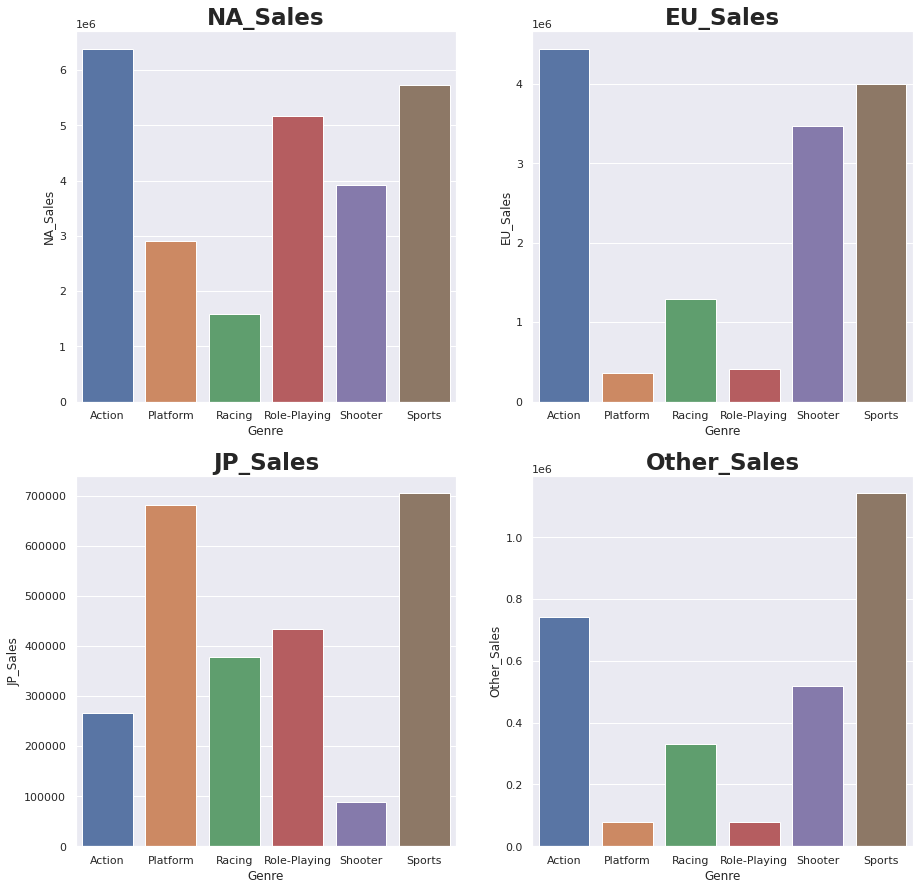

In [166]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.barplot(x='Genre',y='NA_Sales',data=df_genre)
plt.title('NA_Sales', fontdict = title_font)

plt.subplot(222)
sns.barplot(x='Genre',y='EU_Sales',data=df_genre)
plt.title('EU_Sales', fontdict = title_font)

plt.subplot(223)
sns.barplot(x='Genre',y='JP_Sales',data=df_genre)
plt.title('JP_Sales', fontdict = title_font)

plt.subplot(224)
sns.barplot(x='Genre',y='Other_Sales',data=df_genre)
plt.title('Other_Sales', fontdict = title_font)
plt.show()

- 총 판매량 상위 10개 게임을 기준으로 국가별 인기 있는 장르를 살펴 봤더니, 앞서 다뤘던 그래프와는 다른 결과가 나왔습니다. 모든 국가에서 'Sports' 장르가  인기 있는 장르 였습니다.<br>

- 이 결과는 'Action'장르가 전체 시장에서 큰 비중을 차지하긴 하지만  'Sports' 장르가 전체 역대 시장에서의 비중은 크지 않아도 인기를 끌게되면 독점적인 인기를 얻게 된다는 분석을 얻게 됩니다. 또한 'Role-playing'이 NA에서도 상당한 인기를 누리고 있었습니다.<br>
따라서 압도적인 판매량으로 1위를 기록한 'Will Sports'게임을 분석 해보니 2~4인용 게임으로 복싱, 테니스, 야구, 볼링 등등 다양한 스포츠를 닌텐도사의 특수한 게임컨트롤러로 실제로 야외에서 스포츠를 즐기는 듯한 모습으로 제작한게임입니다.

- __장르보다는 출고량이 높은 상위 10개의 게임이 가진 Feature에 주목하겠습니다.__

- 게임의 특징들을 분석해봤을 때 몇몇 공통적인 요소가 있습니다. 'Multiplay', 'Adventure', 'Role-playing'입니다.<br>
사실 장르의 구분이 불분명한 것이 스포츠게임을 제외한 다른 상위 게임들은 대부분 'Role-playing'과 'Adventure'의 요소가 포함 되어있습니다.<br>
'Shooting'으로 분류되어 있는 게임도 알고보면 과거의 사건을 배경으로 게임플레이어가 대신 사건의 중심 인물이 되어 플레이를 하는 'Adventure'적인 요소가 많습니다. <br>
또 하나의 내가 되어서 간접경험을 하는 것 입니다.

- 그리고 'Will sports'도 특수한 컨트롤러를 이용해 '현실처럼' 스포츠를 즐긴다는 특징이 있습니다.<br>
 여기서 게임을 즐기는 사람들의 공통점은 또 다른 나를 양성하면서, 현실처럼 혹은 사건의 중심인물이 되어 플레이 하는 생동감 있는 게임을 원한다는 것을 알 수 있습니다.<br>

- __그러므로,__ Will sports 처럼 다양한 스포츠 게임을 제공하되 자신만의 캐릭터를 생성하여 Status를 성장시킬 수 있는 시스템을 마련하여 게임내 캐릭터의 운동 능력을 향상시킬 수있는 'Role-playing'적인 요소를 추가하고, PS4와 PC라는 플랫폼을 통해 다양한 사람과 경쟁할 수 있고 친구와 함께 스포츠를 즐길 수 있는 'Multiplay'와 단계별로 난이도를 구분하여 보상을 획득하는 모험을 할 수 있는 'Singleplay'모드를 추가하여 종합 스포츠 게임을 설계 하면 사람들의 많은 인기를 끌 수 있을 것입니다.